# Water Quality Monitoring with Machine Learning

## Library

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import pickle

pd.set_option('display.max_columns', None)

## Data Import

***Please uncomment the code below if you are running the notebook for first time and don't have the csv downloaded in your working directory***

In [248]:
!pip install -q kaggle

In [251]:
!kaggle datasets download -d nayanack/water-probability

Dataset URL: https://www.kaggle.com/datasets/nayanack/water-probability
License(s): CC0-1.0
100%|█████████████████████████████████████████| 251k/251k [00:00<00:00, 649kB/s]
100%|█████████████████████████████████████████| 251k/251k [00:00<00:00, 646kB/s]


In [262]:
!unzip -f water-probability.zip

Archive:  water-probability.zip


In [2]:
df_water_potability  = pd.read_csv('water_potability.csv')

In [225]:
df_water_potability.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [226]:
df_water_potability.tail(5)

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [228]:
list(df_water_potability)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

### Domain Knowledge

***Since we are not too good in the data domain knowlegde, it will be good to ask our AI-Assistance some domain questions and read about each features***

In [207]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [208]:
%load_ext jupyter_ai_magics

#### ph

In [209]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "ph" of the water. Can you tell us about "ph" and how it affects water potability?

### pH and Water Potability

The pH level of water is a measure of how acidic or basic it is. The pH scale ranges from 0 to 14, with 7 being considered neutral. 

In terms of water potability, pH is an important factor to consider. Water with a pH below 6.5 may be acidic and can be corrosive, potentially leaching harmful metals such as lead from pipes into the water. On the other hand, water with a pH above 8.5 may be basic and can have a bitter taste.

Ideally, water for human consumption should have a pH between 6.5 and 8.5. Water that falls within this range is considered to be safe and potable for drinking. Monitoring and adjusting the pH of water sources is crucial in ensuring the safety and quality of drinking water.

#### Hardness

In [210]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Hardness" of the water. Can you tell us about "Hardness" and how it affects water potability?

## Hardness of Water

Hardness of water is a measure of the concentration of calcium and magnesium ions in the water. These ions can make the water taste bitter and can also lead to the buildup of scale in pipes and appliances.

### Effects on Water Potability

1. **Taste**: Hard water can have a bitter taste, which may not be aesthetically pleasing to consumers.
   
2. **Health**: Consuming hard water is generally safe for health, as calcium and magnesium are essential minerals for the body. However, extremely high levels of these minerals can lead to health issues.

3. **Scale Formation**: Hard water can lead to the buildup of scale in pipes and appliances, reducing their efficiency and lifespan.

4. **Soap Efficiency**: Hard water can reduce the lathering ability of soap, leading to the need for more soap to achieve the desired cleaning effect.

In general, moderate hardness levels are safe for consumption, but extremely hard water may not be suitable for potable purposes. It is important to monitor and treat water hardness levels to ensure water potability.

#### Solids

In [211]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Solids" of the water. Can you tell us about "Solids" and how it affects water potability?

**Solids in Water and its Impact on Potability**

- Solids in water refer to any suspended or dissolved particles that are present in the water. These solids can be either organic or inorganic in nature.

- The presence of solids in water can have a significant impact on its potability. High levels of solids can affect the taste, odor, and appearance of the water, making it unpalatable for consumption.

- In addition, certain solids may also contain harmful contaminants such as heavy metals, bacteria, and other pathogens, which can pose a health risk to those consuming the water.

- Therefore, it is important to monitor and control the levels of solids in water to ensure its potability and safety for human consumption. This can be achieved through proper filtration and treatment processes to remove any harmful solids present in the water.

#### Chloramines

In [212]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Chloramines" of the water. Can you tell us about "Chloramines" and how it affects water potability?

## Chloramines

Chloramines are chemical compounds that are formed when ammonia is added to water containing free chlorine. They are commonly used as disinfectants in water treatment plants because they are more stable and have a longer-lasting effect compared to free chlorine.

### Effects on water potability

Chloramines are effective at killing bacteria and other harmful organisms in water, making it safe for consumption. However, high levels of chloramines in water can have negative effects on human health, such as skin irritation, respiratory problems, and digestive issues.

In terms of water potability classification, the presence of chloramines should be carefully monitored to ensure that they are within safe levels for human consumption. Testing for chloramines in water is essential to determine its potability and to protect public health.

#### Sulfate

In [213]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Sulfate" of the water. Can you tell us about "Sulfate" and how it affects water potability?

"Sulfate" is a chemical compound that consists of sulfur and oxygen atoms. It is commonly found in water sources as a result of natural geological processes, industrial activities, or agricultural runoff. 

In terms of water potability, sulfate itself is not typically a direct health concern at levels commonly found in drinking water. However, high levels of sulfate in water can have a laxative effect and cause gastrointestinal issues, particularly in individuals with sensitive digestive systems. 

Furthermore, sulfate in water can react with certain metals and form sulfides, which can give water a foul taste and odor. Sulfate can also contribute to the formation of scale in pipes and plumbing fixtures, which can reduce water flow and quality. 

In summary, while sulfate itself may not pose a significant health risk at typical levels, it can affect the taste, odor, and overall quality of water, which may impact its potability. Testing for sulfate levels in water sources is important to ensure that water meets the necessary quality standards for safe consumption.

#### Conductivity

In [214]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Conductivity" of the water. Can you tell us about "Conductivity" and how it affects water potability?

Conductivity is a measure of how well a substance conducts electricity. In the context of water, conductivity is a key indicator of the presence of dissolved ions, such as salts and minerals. High conductivity in water can indicate the presence of contaminants that may affect its potability.

Water with high conductivity may contain elevated levels of dissolved solids, such as heavy metals, nitrates, or other contaminants that can pose health risks if consumed. Therefore, high conductivity levels in water can be a sign of poor water quality and may indicate that the water is not suitable for drinking without proper treatment.

In summary, conductivity is an important parameter to consider when assessing the potability of water. High conductivity levels can be an indicator of water contamination and may suggest the need for further testing and treatment to ensure the water is safe for consumption.

#### Organic_carbon

In [215]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Hardness" of the water. Can you tell us about "Hardness" and how it affects water potability?

**Hardness** 

Hardness refers to the concentration of minerals, particularly calcium and magnesium, in water. Water can be classified as either hard or soft based on the levels of these minerals present. 

**Effects on Water Potability**

1. **Taste and Odor**: Hard water is often described as having a slightly salty or mineral taste, which can be off-putting to some individuals. This can affect the overall palatability of the water.

2. **Health Concerns**: While hard water is not considered harmful to health, extremely high levels of hardness can lead to the formation of scale in pipes and appliances, reducing their efficiency and lifespan.

3. **Cleaning**: Hard water can make it more difficult to lather soap and detergents, leading to soap scum and residue on dishes, laundry, and surfaces. This can impact the effectiveness of cleaning processes.

4. **Skin and Hair**: Some individuals may experience dryness or irritation of the skin and hair when exposed to hard water, as the minerals can interfere with the natural oils present.

Overall, while hard water is generally safe to drink, it can have negative effects on taste, cleaning efficiency, and overall user experience. Monitoring and potentially treating water hardness levels can help ensure water potability and improve water quality.

#### Trihalomethanes

In [216]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Organic_carbon" of the water. Can you tell us about "Organic_carbon" and how it affects water potability?

Organic_carbon is a measure of the amount of carbon-containing compounds present in water that are of natural origin. These compounds can come from decaying organic matter, such as leaves or plant material, and can also be produced by living organisms. 

The presence of organic carbon in water can affect its potability in several ways. High levels of organic carbon can contribute to the growth of harmful bacteria and other microorganisms, which can pose a health risk to consumers. Additionally, organic carbon can react with disinfectants used to treat water, such as chlorine, forming harmful byproducts that can be carcinogenic.

Therefore, monitoring and controlling the levels of organic carbon in water is important for ensuring its potability and safety for consumption. Analyzing the organic carbon content can help water treatment facilities determine the appropriate treatment processes needed to remove or reduce contaminants and ensure that the water meets regulatory standards for potability.

#### Turbidity

In [217]:
%%ai openai-chat:gpt-3.5-turbo
We are working to classify correctly potability of water with some chemical components including "Turbidity" of the water. Can you tell us about "Turbidity" and how it affects water potability?

**Turbidity** refers to the cloudiness or haziness of water caused by suspended particles such as sediment, algae, and other impurities. High levels of turbidity in water can indicate the presence of contaminants and make it difficult to see through the water. 

Turbidity can affect water potability by:
- Reducing the effectiveness of disinfection processes, allowing harmful bacteria and pathogens to survive in the water.
- Acting as a shield for bacteria, making it harder for disinfectants to reach and kill them.
- Providing a medium for the growth of bacteria and other microorganisms.
- Impacting the taste, odor, and appearance of the water, which can deter people from consuming it.

Monitoring turbidity levels is important in determining the quality of water for drinking purposes. High turbidity levels may require additional treatment processes to ensure that the water is safe to drink.

## Data Exploration

### Heat Maps

<Axes: >

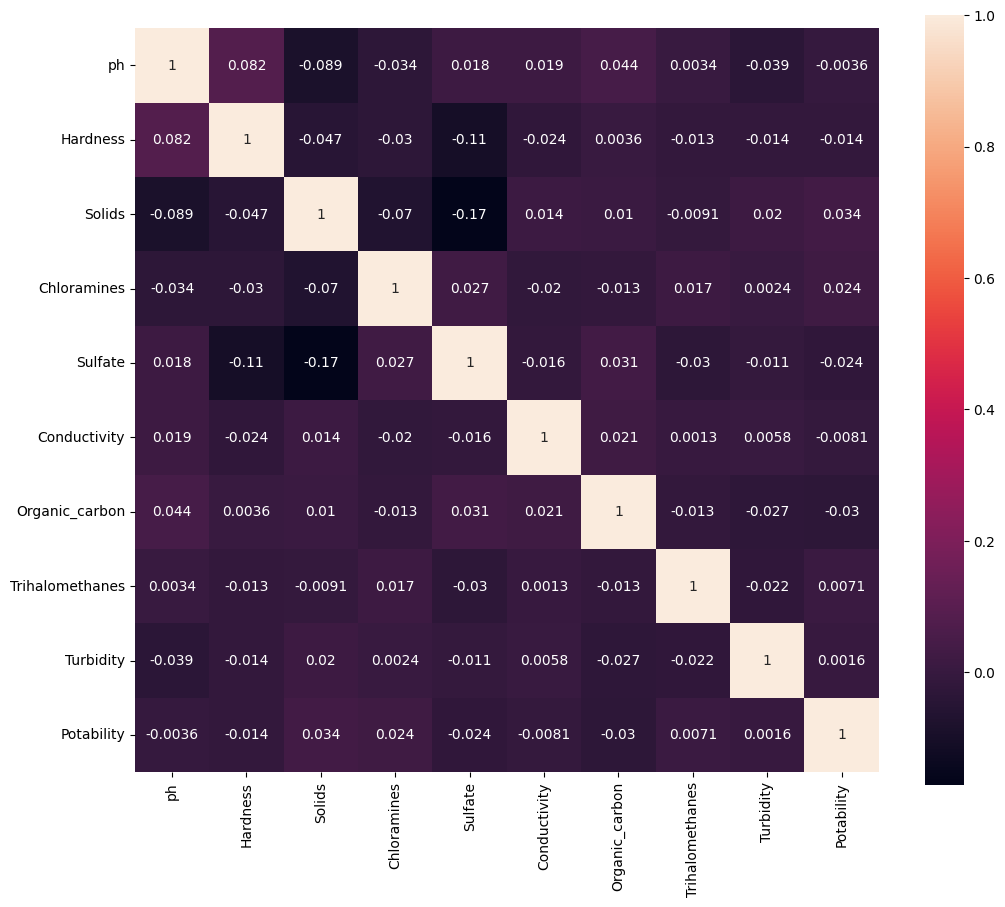

In [169]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_water_potability.corr(), square=True, annot=True, cbar=True, ax=ax)

### Pair plot

<Figure size 1000x600 with 0 Axes>

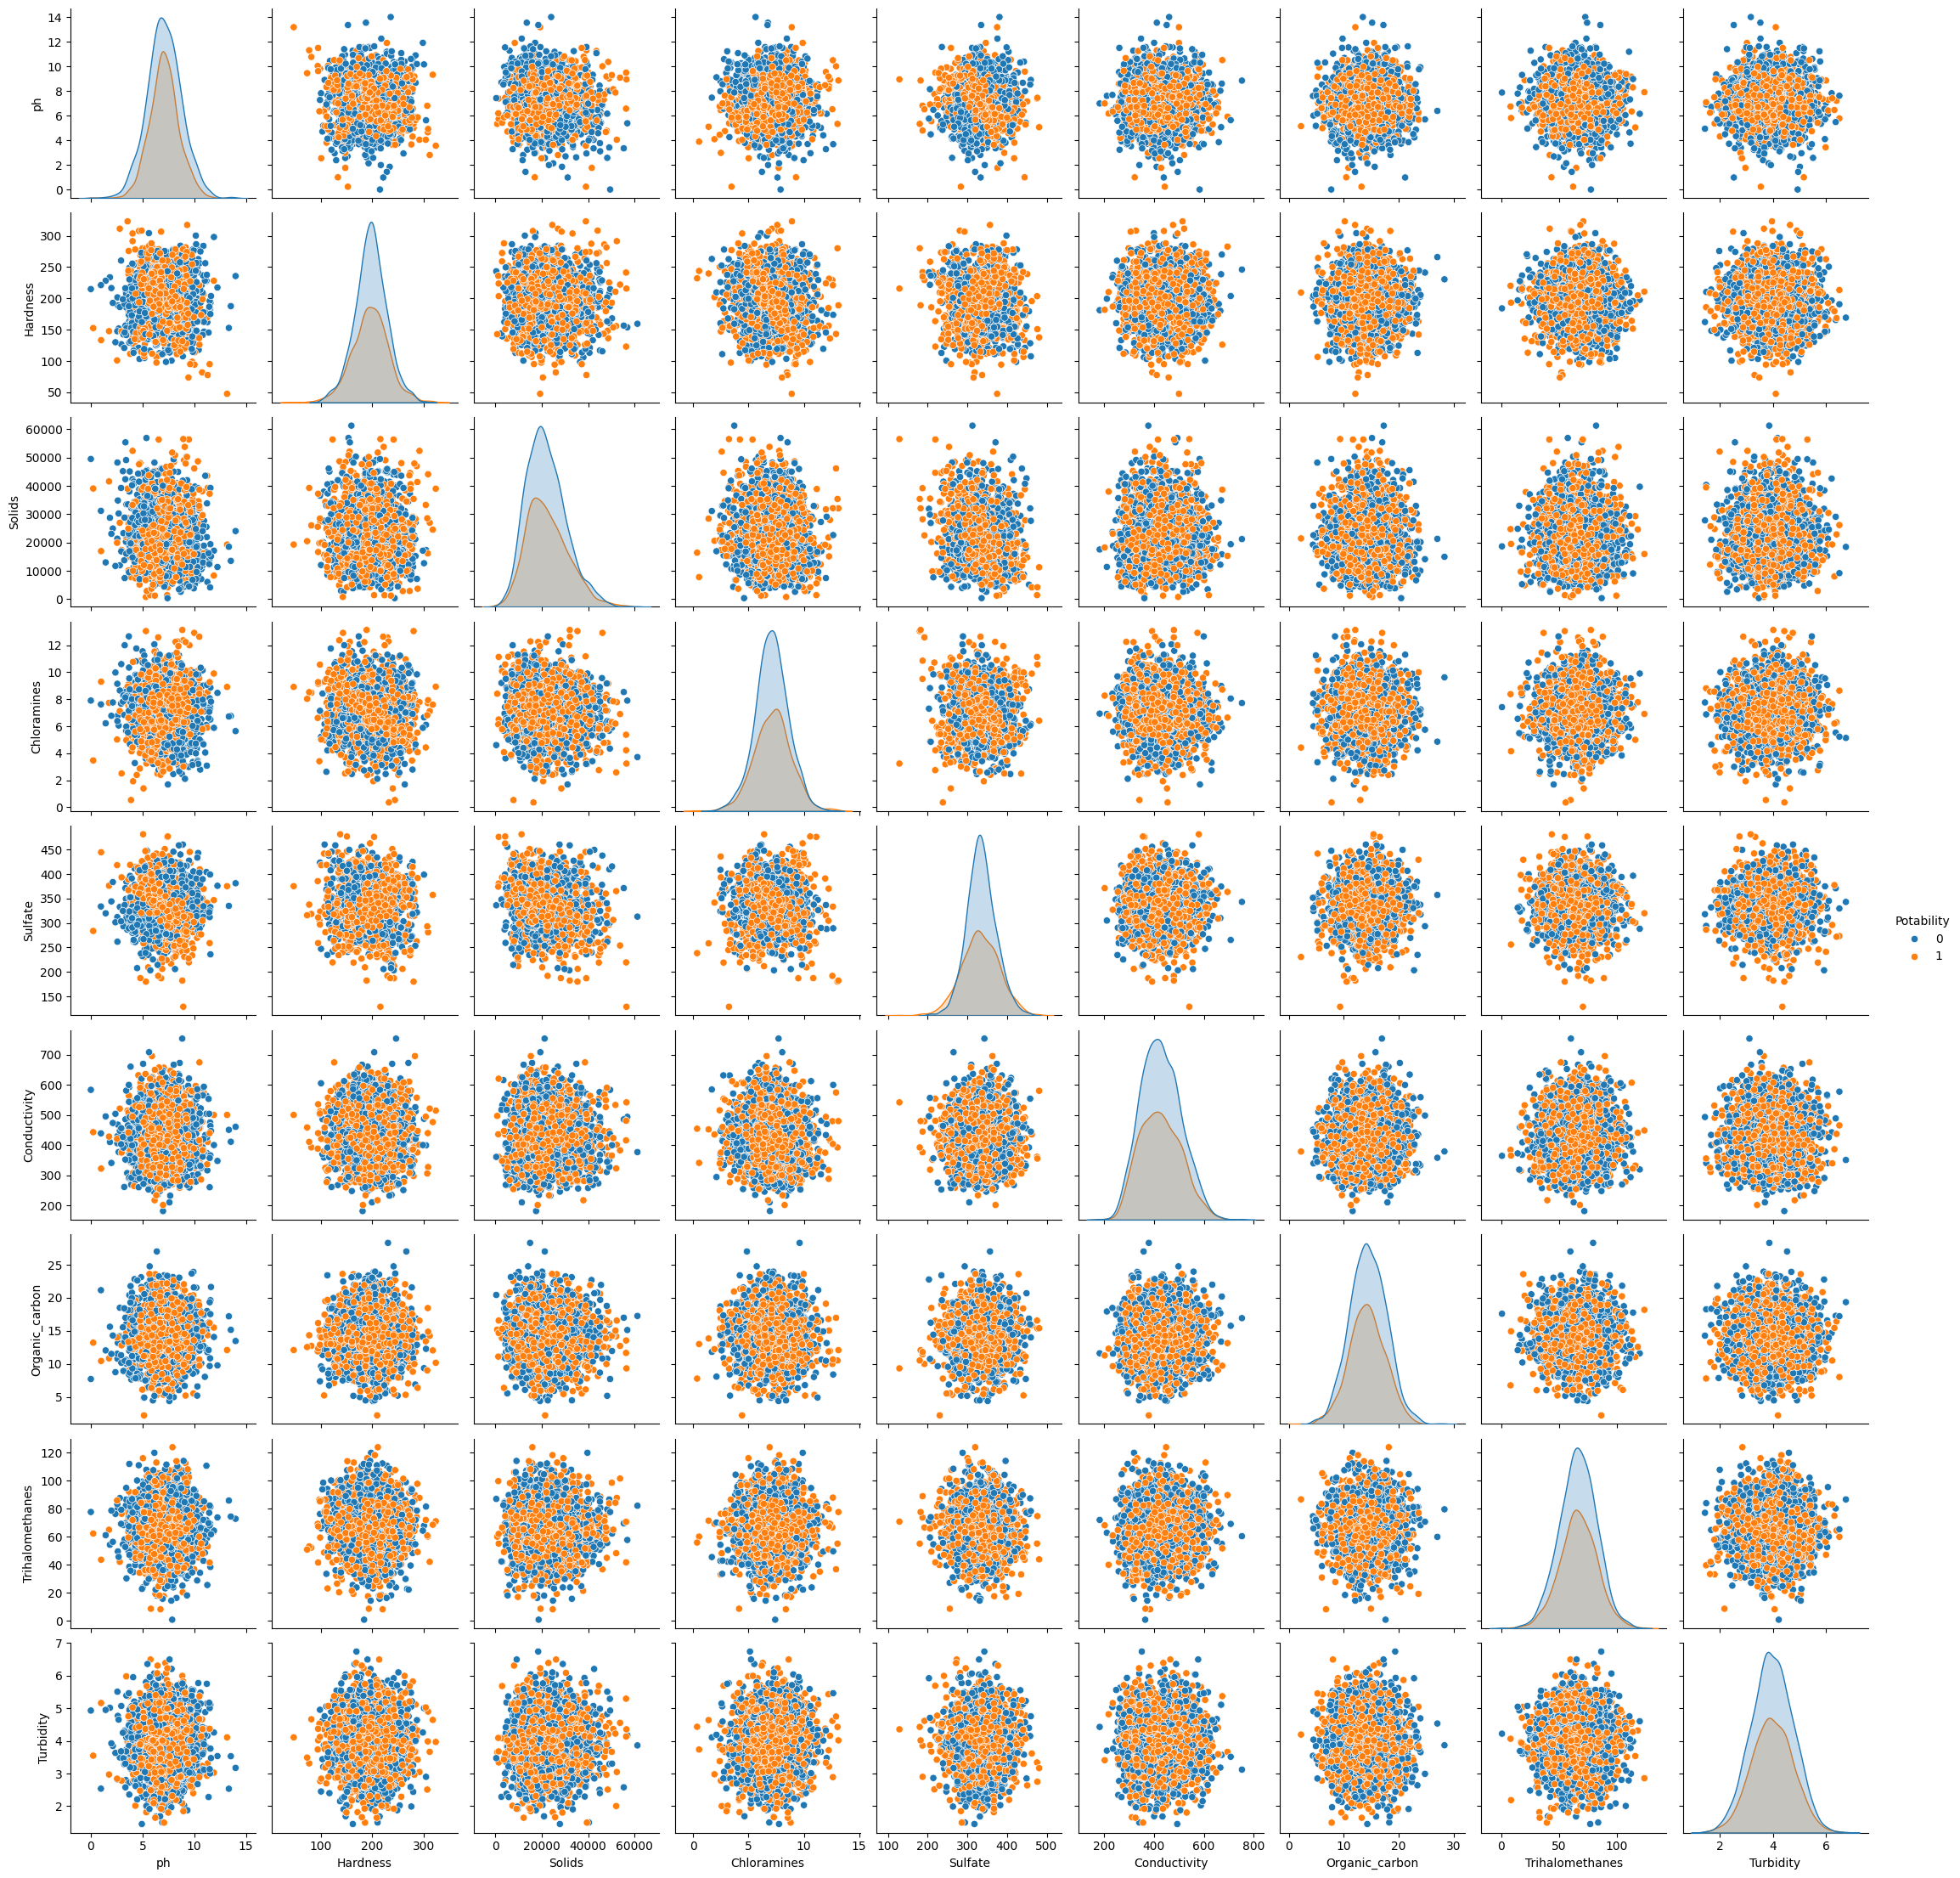

In [221]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_water_potability, hue='Potability')
plt.show()

### Box plot

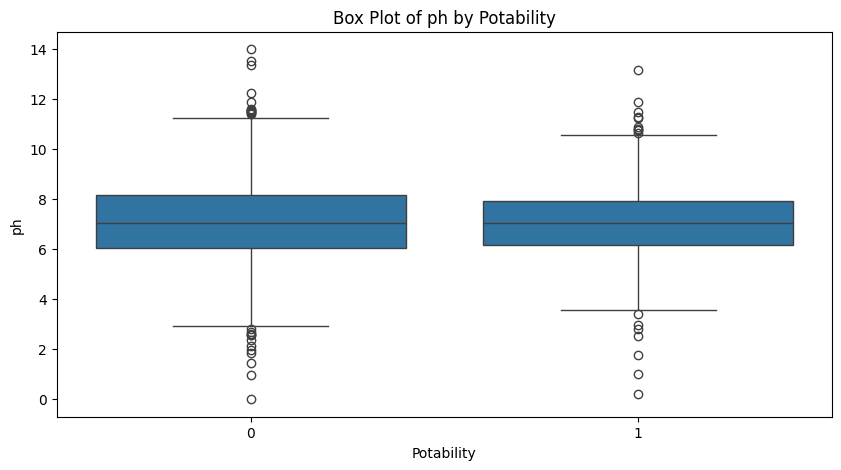

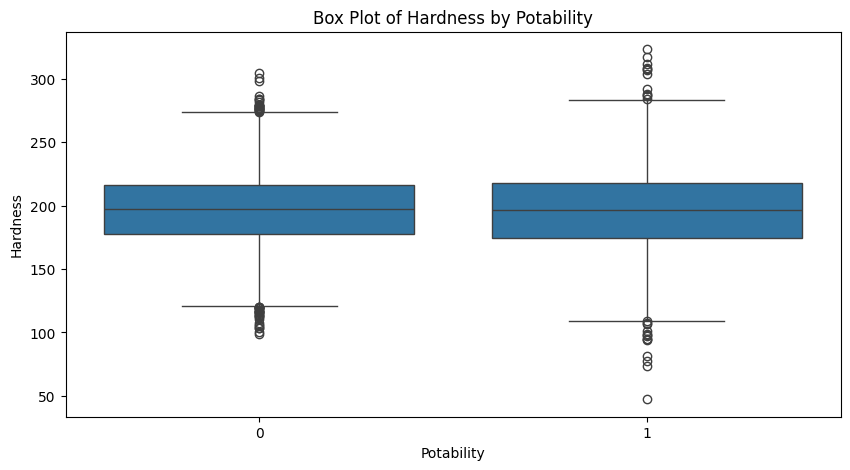

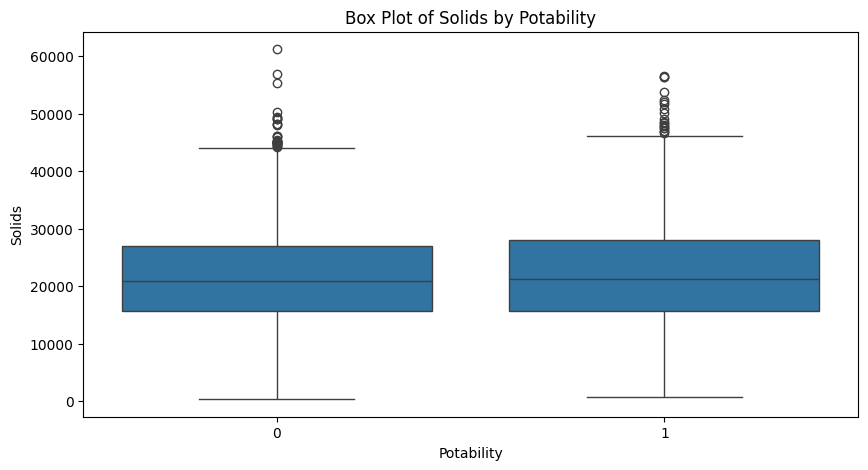

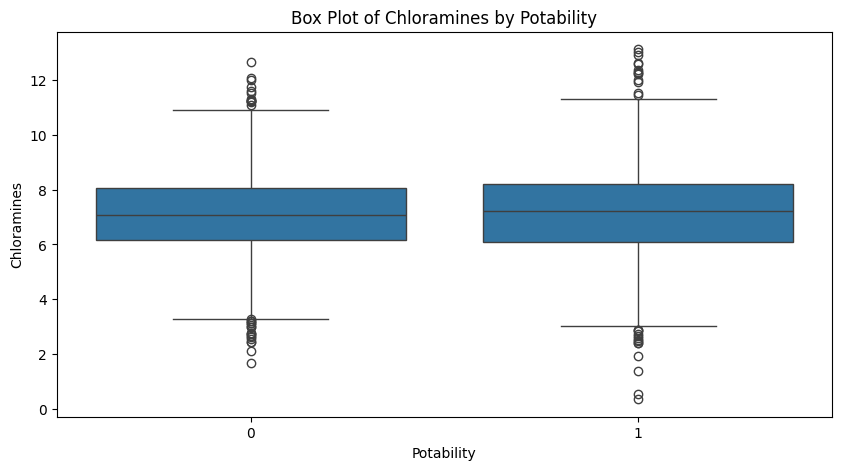

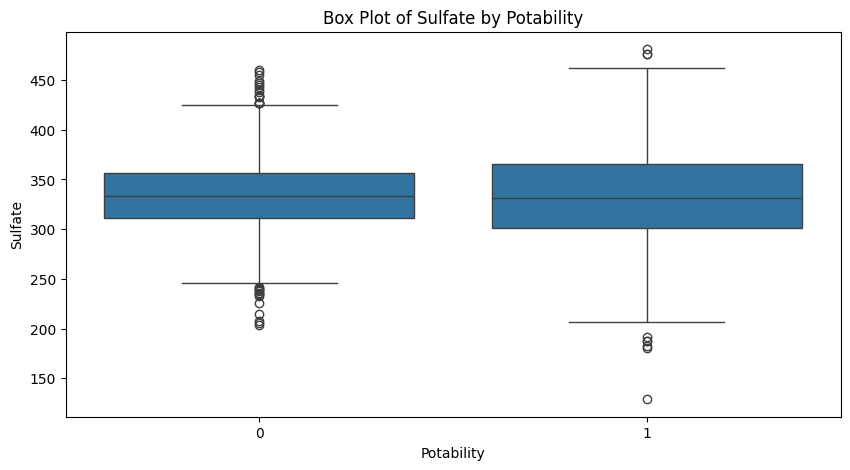

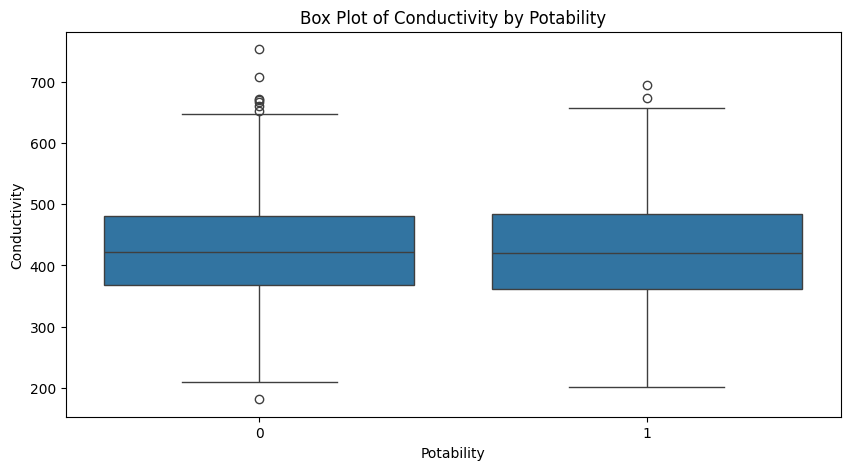

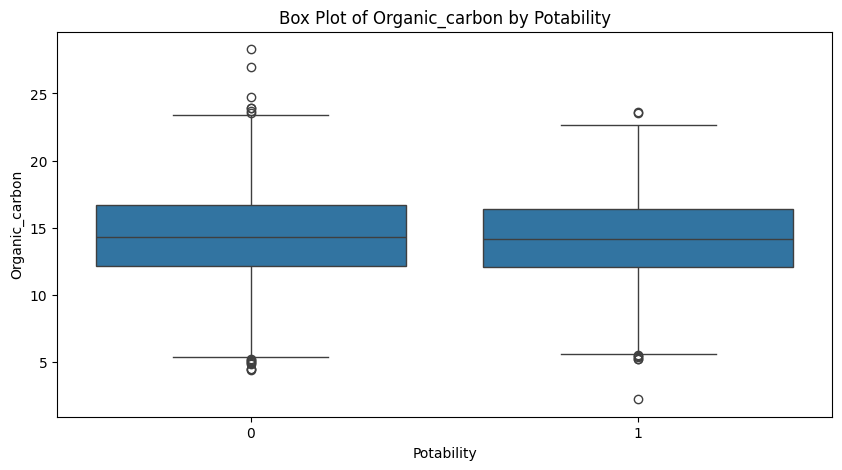

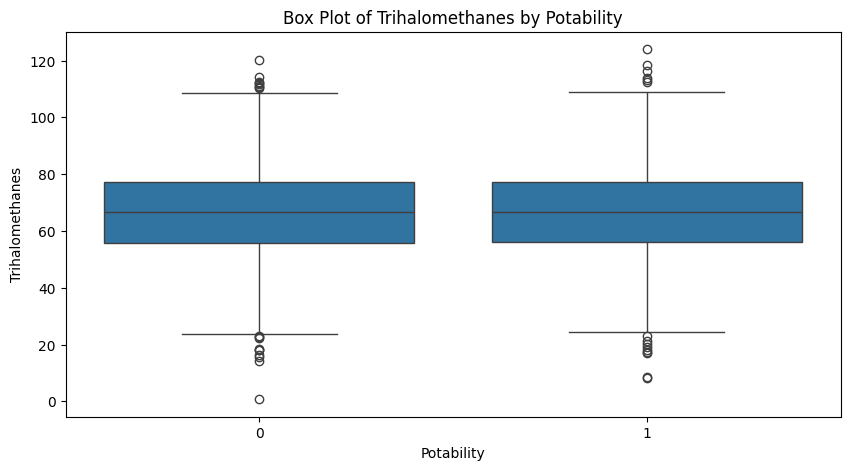

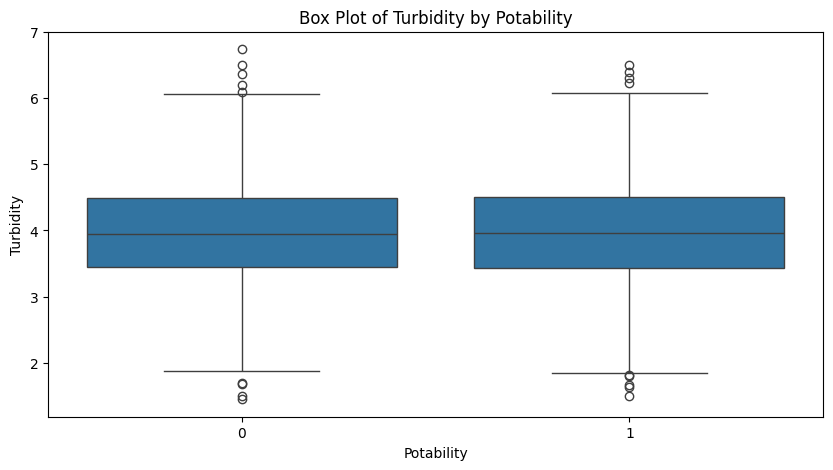

In [218]:
for column in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Potability', y=column, data=df_water_potability)
    plt.title(f'Box Plot of {column} by Potability')
    plt.show()

### Violin plot

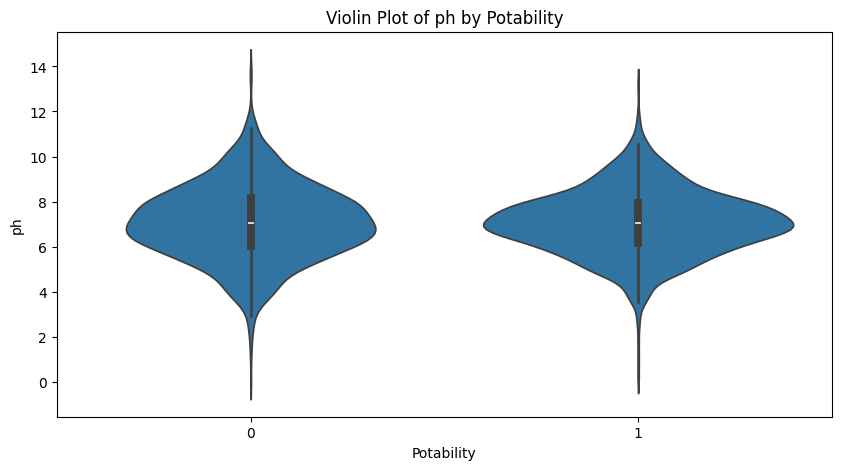

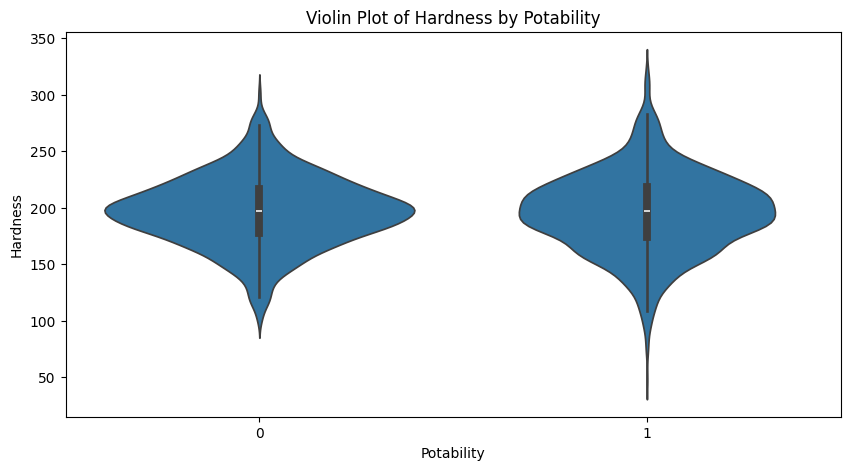

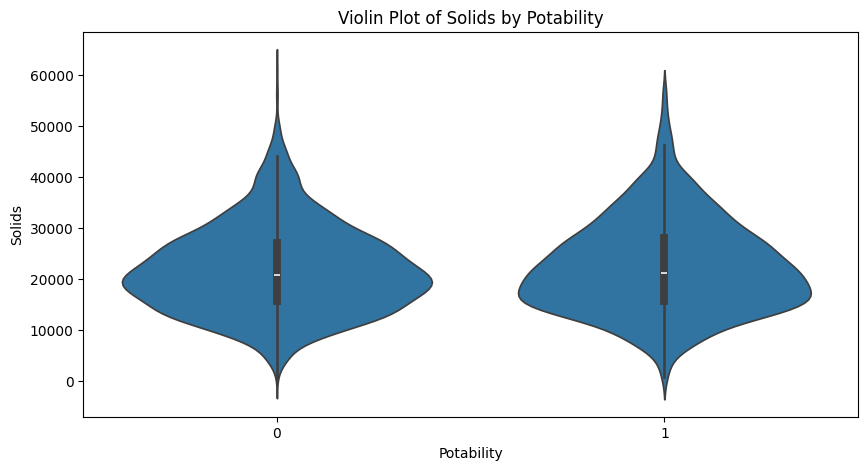

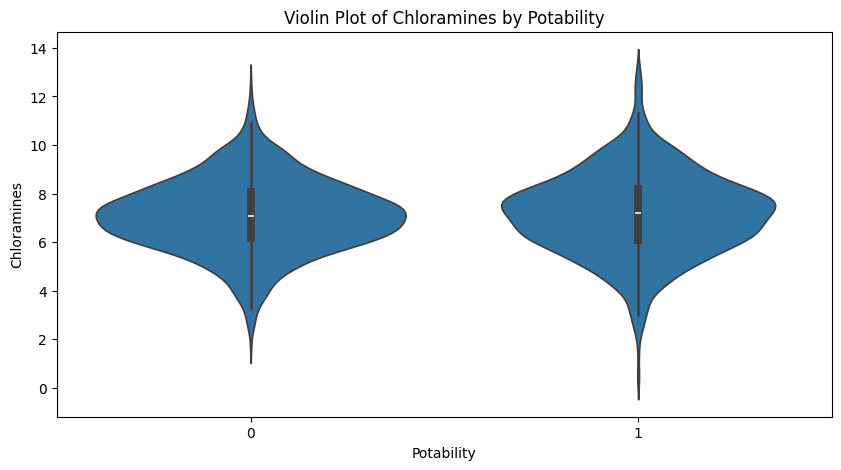

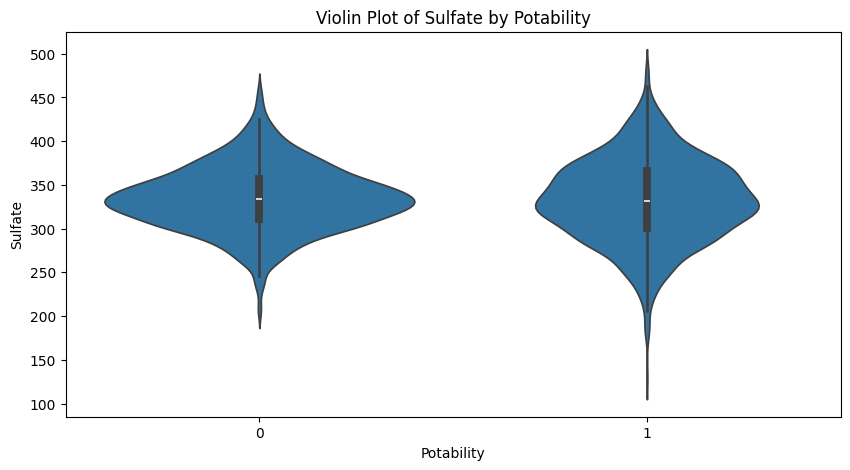

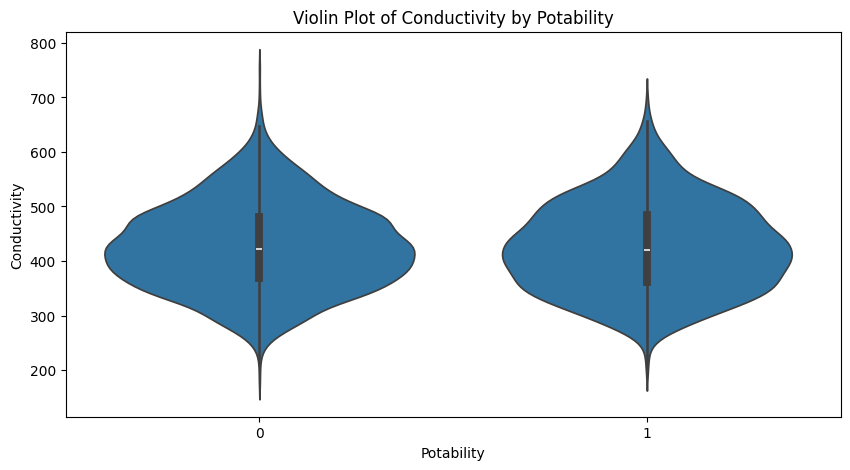

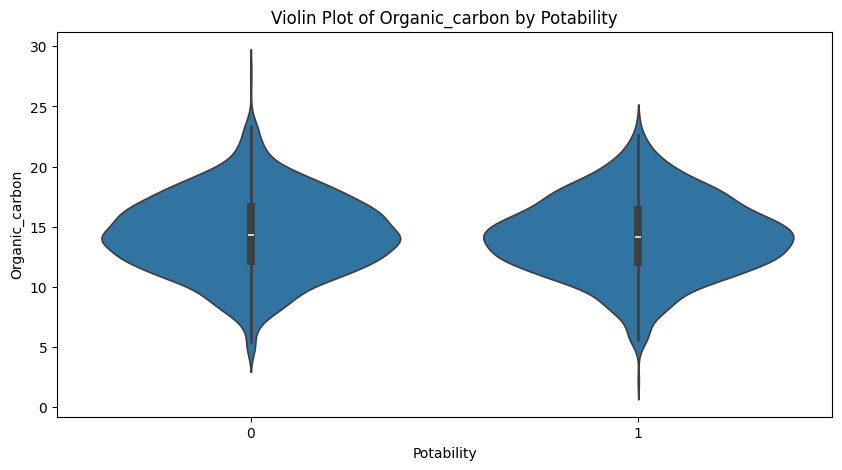

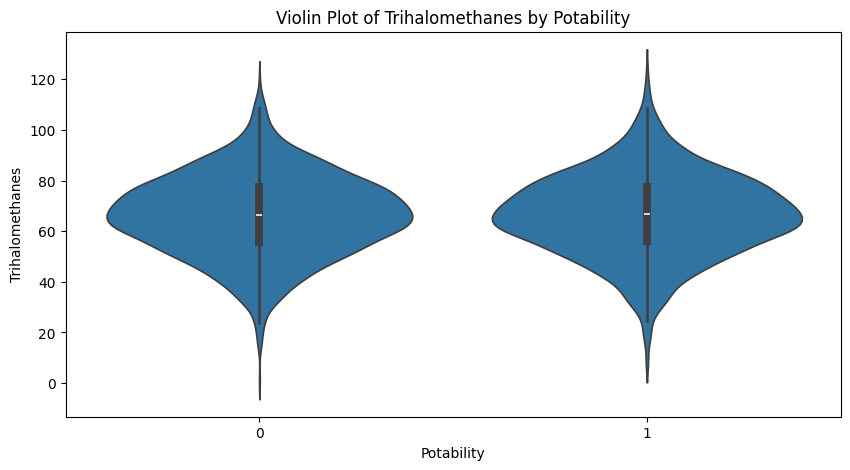

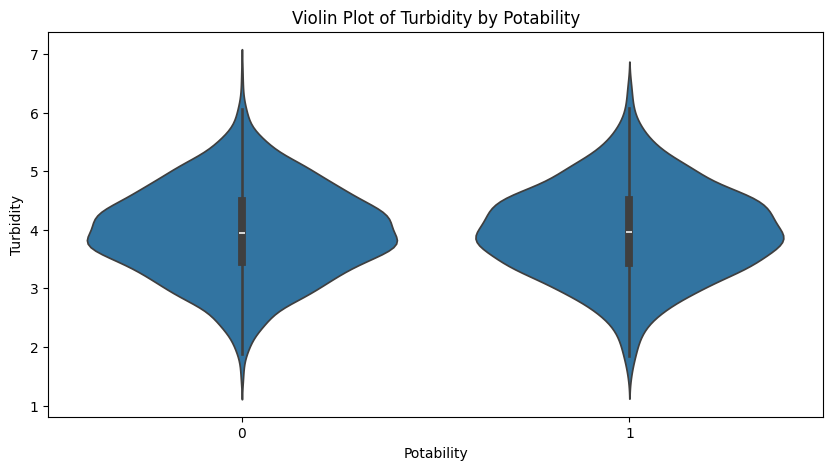

In [219]:
for column in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Potability', y=column, data=df_water_potability)
    plt.title(f'Violin Plot of {column} by Potability')
    plt.show()

### Swarm plot

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


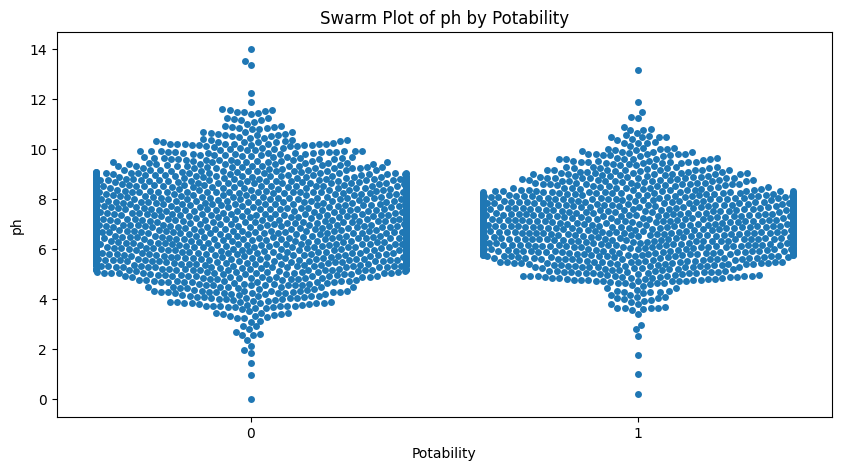

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


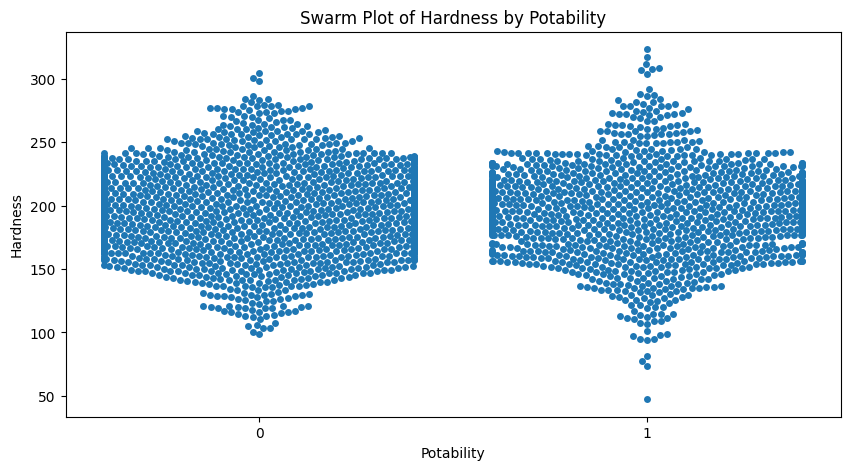

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


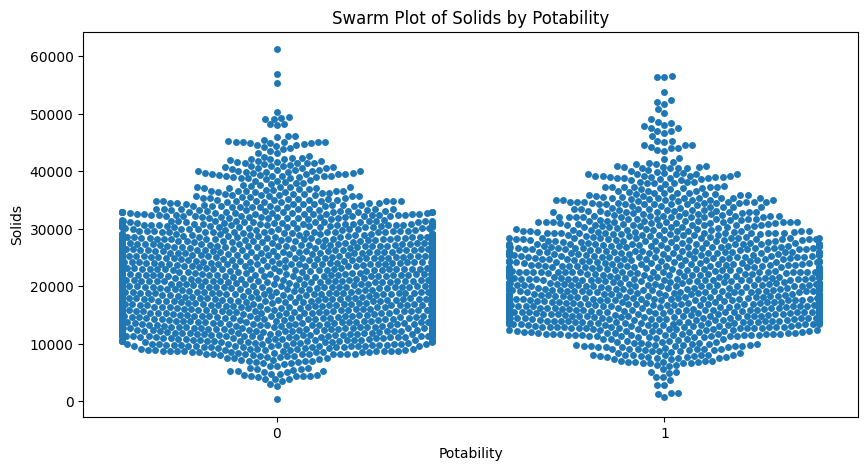

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


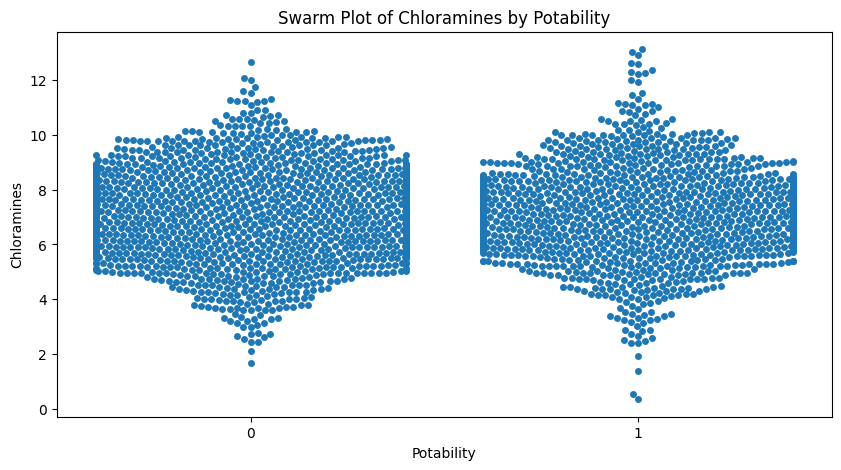

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


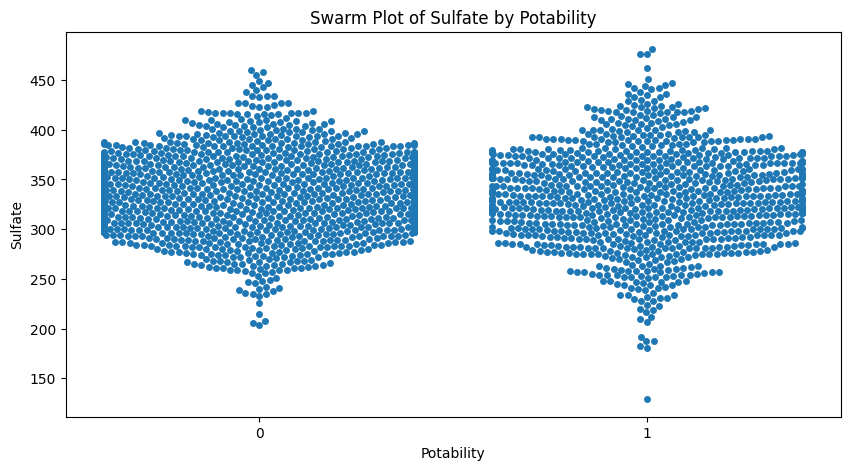

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


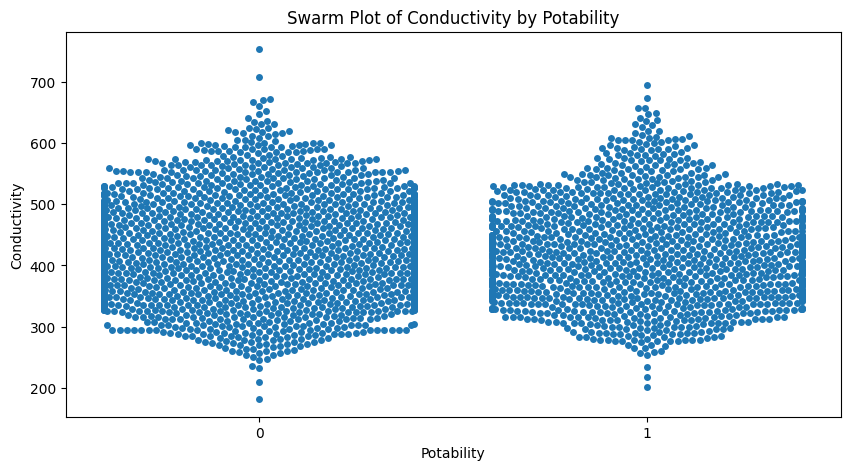

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


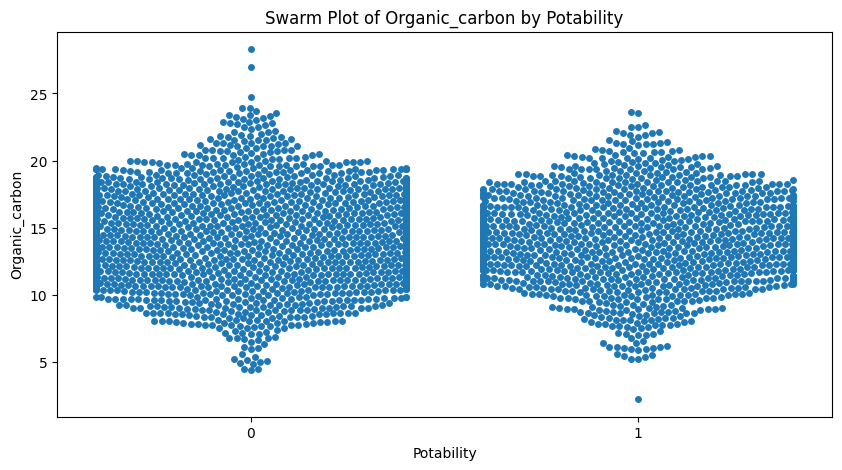

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


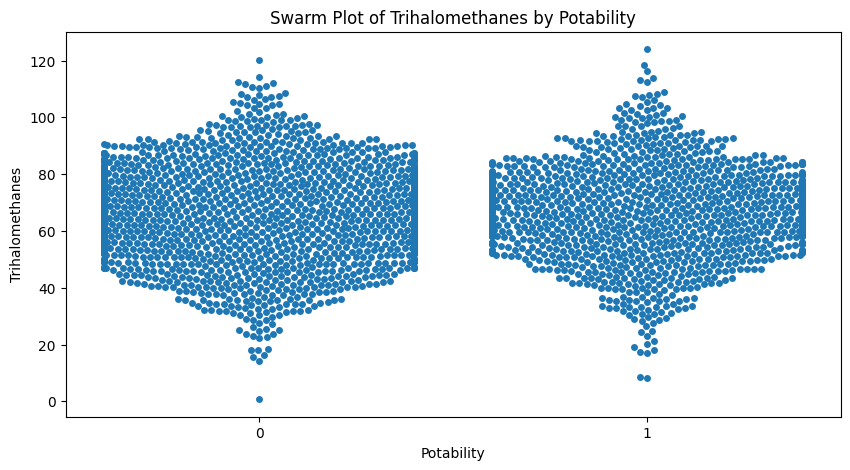

/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


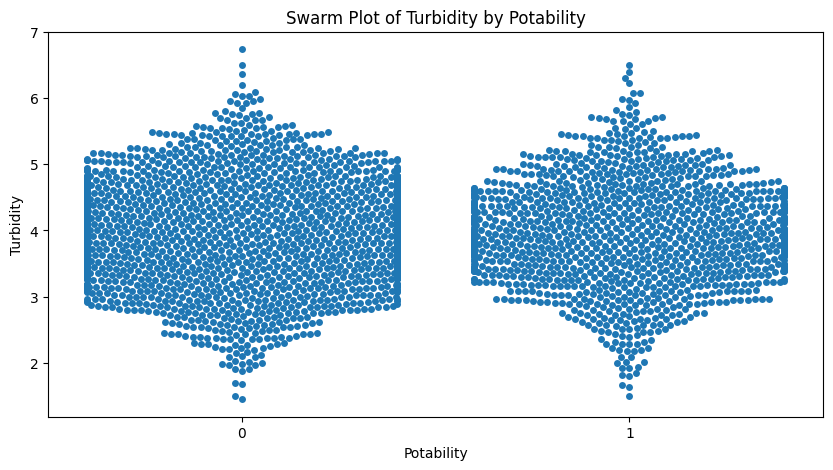

In [220]:
for column in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    plt.figure(figsize=(10, 5))
    sns.swarmplot(x='Potability', y=column, data=df_water_potability)
    plt.title(f'Swarm Plot of {column} by Potability')
    plt.show()

###

****A box plot offers a visual representation of the distribution, central tendency, and spread of the dataset, helping to identify outliers and understand the variability and skewness of the Potability. The plot reveals numerous outliers in both categories: 0 (water is not potable) and 1 (water is potable).***

***The heatmap visually depicts the relationships between pairs of variables within the dataset, offering insights into the strength and direction of linear relationships among variables. A correlation coefficient close to 1 signifies a strong positive correlation, close to -1 indicates a strong negative correlation, and around 0 suggests little to no correlation. From the plot above, it's evident that there is no multicollinearity between the features. Additionally, the features are not strongly correlated with the target variable, which may indicate potential difficulties in classifying water potability.***

### 

### Target Variable Analysis

In [171]:
df_water_potability['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [172]:
counts= df_water_potability['Potability'].value_counts()
perc = df_water_potability['Potability'].value_counts(normalize='index') * 100
pd.DataFrame({'count': counts, 'perc- %': perc.round(2)}).reset_index()

Potability  count  perc- %
0           0   1998    60.99
1           1   1278    39.01

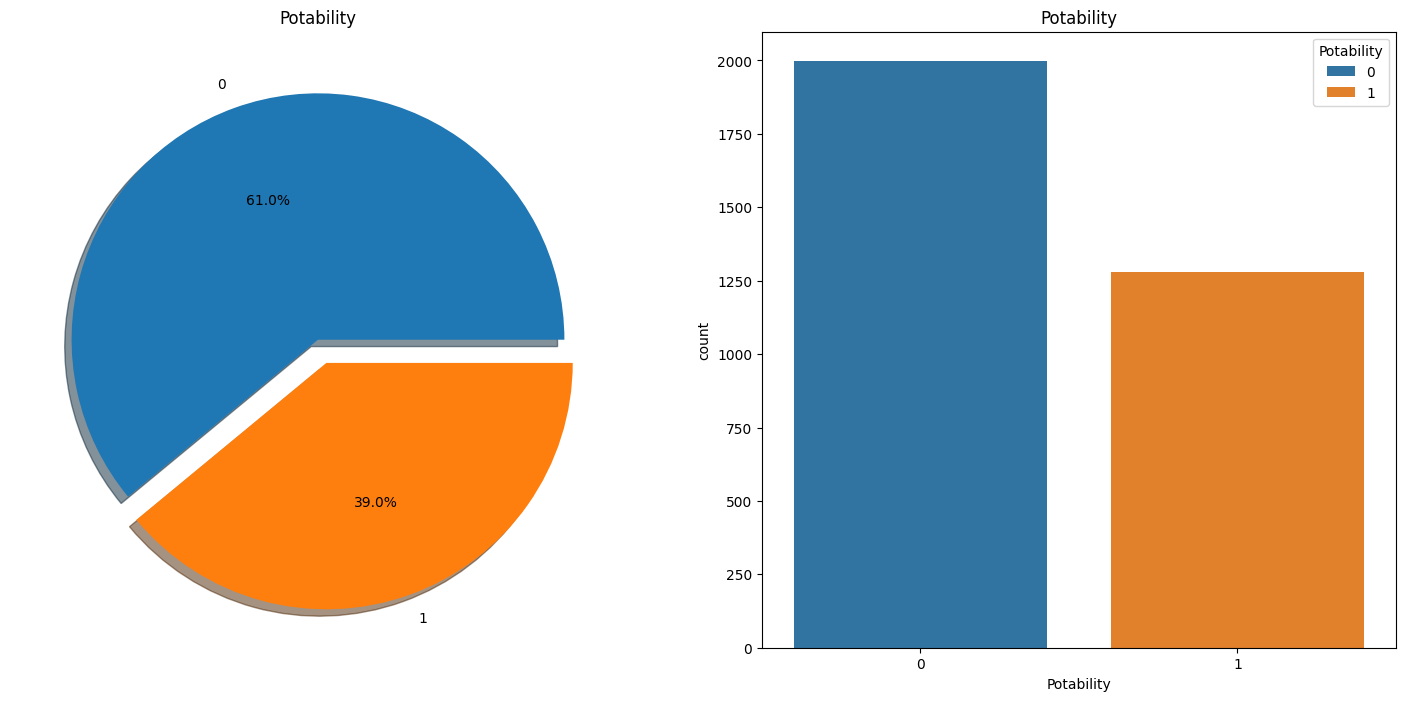

In [173]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_water_potability['Potability'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Potability')
ax[0].set_ylabel('')
sns.countplot(x='Potability',data=df_water_potability,ax=ax[1], hue='Potability')
ax[1].set_title('Potability')
plt.show()

###

***From the analysis of the target data distribution and percentages, it is clear that most of the water samples are not potable. We can also deduce that the data is not balanced, which we will address later in the analysis.***

###

### Missing Data

In [229]:
df_water_potability.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [230]:
# percent of missing "PH" 
print('Percent of missing data in column "ph" is %.2f%%' %((df_water_potability['ph'].isnull().sum()/df_water_potability.shape[0])*100))

Percent of missing data in column "ph" is 14.99%


In [279]:
# percent of missing "Sulfate" 
print('Percent of missing data in column "Sulfate" is %.2f%%' %((df_water_potability['Sulfate'].isnull().sum()/df_water_potability.shape[0])*100))

Percent of missing data in column "Sulfate" is 23.84%


In [232]:
# percent of missing "Trihalomethanes" 
print('Percent of missing data in column "Trihalomethanes" is %.2f%%' %((df_water_potability['Trihalomethanes'].isnull().sum()/df_water_potability.shape[0])*100))

Percent of missing data in column "Trihalomethanes" is 4.95%


## Feature Engineering

### Outlier Removal

In [234]:
def remove_outliers(df, key_features):
    mask = pd.Series(True, index=df.index)
    for column in key_features:
        if column in df.select_dtypes(include=['int64', 'float64']).columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            column_mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
            mask = mask & column_mask
    return df[mask].reset_index(drop=True)

In [235]:
key_features = ['Solids', 'Organic_carbon']
df_water_potability_wo = remove_outliers(df_water_potability, key_features)

###

***We aim to reduce the outliers in the data by removing outliers from the Solids and Organic_carbon fields. Given the limited dataset, it would be too harsh to apply this process to all fields.***

### Imputation

***Around 15% of PH, 24% of Sulfate and lastly, 5% percent of the Trihalomethanes data is missing. This percentage is not so high, we can fill the missing age through imputation.***

###

/var/folders/jx/_xm3vpjj6sbc2s0vkvwl7wp80000gp/T/ipykernel_8725/4186087609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_water_potability['ph'].dropna(), bins=30);


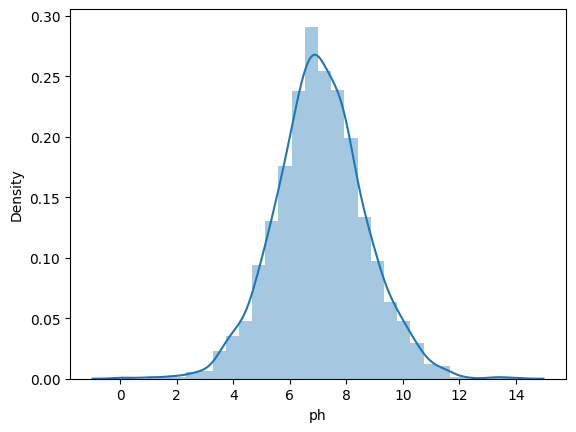

In [222]:
sns.distplot(df_water_potability['ph'].dropna(), bins=30);

/var/folders/jx/_xm3vpjj6sbc2s0vkvwl7wp80000gp/T/ipykernel_8725/1334628729.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_water_potability['Sulfate'].dropna(), bins=30);


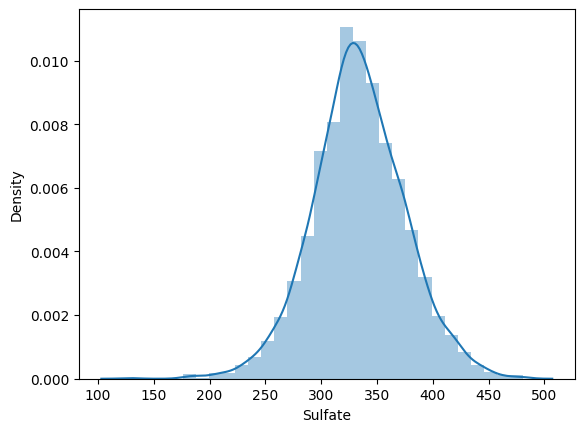

In [223]:
sns.distplot(df_water_potability['Sulfate'].dropna(), bins=30);

/var/folders/jx/_xm3vpjj6sbc2s0vkvwl7wp80000gp/T/ipykernel_8725/826731355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_water_potability['Trihalomethanes'].dropna(), bins=30);


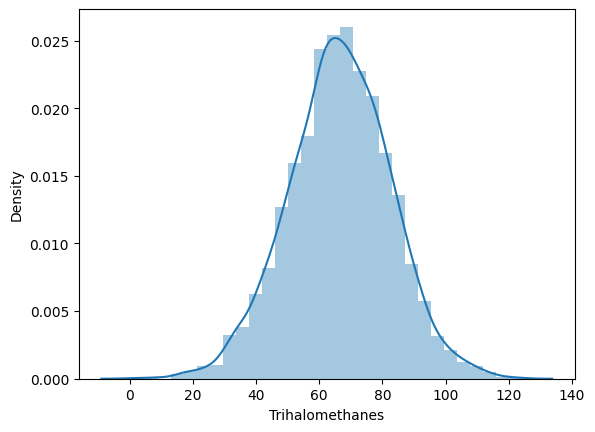

In [224]:
sns.distplot(df_water_potability['Trihalomethanes'].dropna(), bins=30);

***The three dataset distribution are normal and do not skewed and we are safe to use the mean to fill the null value****

In [5]:
ph_mean = df_water_potability_wo['ph'].mean()
sulfate_mean = df_water_potability_wo['Sulfate'].mean()
trihalomethanes_mean = df_water_potability_wo['Trihalomethanes'].mean()

In [6]:
df_water_potability_wo['ph'] = df_water_potability_wo[['ph']].fillna(ph_mean)
df_water_potability_wo['Sulfate'] = df_water_potability_wo[['Sulfate']].fillna(sulfate_mean)
df_water_potability_wo['Trihalomethanes']= df_water_potability_wo[['Trihalomethanes']].fillna(trihalomethanes_mean)

### Data Splitting

In [7]:
X = df_water_potability_wo.drop(columns=['Potability'], axis=1)
y = df_water_potability_wo['Potability']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.20,
                                                    random_state=42)

### Scaling

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

### Principal Component Analysis (PCA)

In [274]:
pca = PCA(n_components=0.95)
components = pca.fit_transform(X_scaled_train)

In [275]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [276]:
d

9

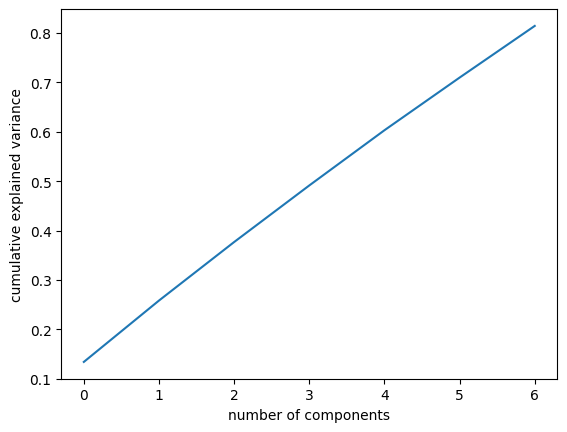

In [273]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

***We used PCA to assess feature importance. From the plot above, it is evident that the number of features is linearly correlated with their importance.***

## Model Training and Evaluation

In [18]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Artificial Neural Network': MLPClassifier()
}

In [152]:
parameters = {
    'Logistic Regression': {'solver': ['lbfgs', 'liblinear'],
                            'penalty': ['l2'],
                            'C': [0.01, 0.1, 1, 10]},
    
    'Decision Tree': {'max_features': ['sqrt', 'log2'], 
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 6, 8, 10],
                      'min_samples_split': [2, 5],
                      'min_samples_leaf': [1, 2]},
    
    'Random Forest': {'max_features': ['sqrt', 'log2'], 
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 6, 8, 10],
                      'min_samples_split': [2, 5],
                      'min_samples_leaf': [1, 2],
                      'n_estimators': [100, 200]},
    
    'Support Vector Machine': {'C': [0.1, 1, 10],  
                               'gamma': [0.1, 0.01, 0.001], 
                               'kernel': ['rbf', 'linear']},
    
    'k-Nearest Neighbors': {'n_neighbors': list(range(1, 21)),
                            'weights': ['uniform', 'distance']},
    
    'Artificial Neural Network': {'solver': ['adam', 'lbfgs'],
                                  'max_iter': [1000, 1500],
                                  'alpha': 10.0 ** -np.arange(1, 5), 
                                  'hidden_layer_sizes': [(10,), (12,), (14,)],
                                  'activation': ["logistic", "relu", "tanh"],
                                  'learning_rate': ["constant", "adaptive", 0.001, 0.01, 0.0001],
                                     'shuffle': [True, False]}
}


In [153]:
parameters = {
    'Logistic Regression': {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                            'penalty': [None, 'l2'],
                            'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    
    'Decision Tree': {'max_features': ['sqrt', 'log2'], 
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]},
    
    'Random Forest': {'max_features': ['sqrt', 'log2'], 
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'n_estimators': [100, 200, 300]},
    
    'Support Vector Machine': {'C': [0.1, 1, 10],  
                               'gamma': [0.1, 0.01, 0.001], 
                               'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
    
    'k-Nearest Neighbors': {'n_neighbors': list(range(1, 31)),
                            'weights': ['uniform', 'distance']},
    
    'Artificial Neural Network': {'solver': ['adam', 'lbfgs'],
                                  'max_iter': [1000, 1100, 1200, 1300, 1400, 1500, 1600],
                                  'alpha': 10.0 ** -np.arange(1, 10), 
                                  'hidden_layer_sizes': [(10,), (20,), (30,),(50,), (100,), (200,)],
                                  'activation': ["logistic", "relu", "tanh"],
                                  'learning_rate': ["constant", "invscaling", "adaptive", 0.001, 0.01, 0.0001],
                                     'shuffle': [True, False]}
}

In [280]:
def model_training(classifiers, parameters, X_train, y_train):
    """
    The function uses randomsearch to look through the hyperparameters space to get the best models.
    """
    trained_models = {}
    for name, clf in classifiers.items():
        print(f"Now training {name}")
        params = parameters[name]
        """grid_search = GridSearchCV(estimator=clf,  
                                   param_grid=params,
                                   scoring='accuracy',
                                   cv=10,
                                   verbose=0,
                                  n_jobs =-1)"""
        randomized_search = RandomizedSearchCV(estimator=clf, 
                                               param_distributions=params,
                                               n_iter=50,
                                               scoring='accuracy',
                                               cv=10,
                                               verbose=1,
                                               n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        trained_models[name] = best_model
        print(f"Done training {name}")
    return trained_models

In [184]:
def model_pred(models_cls, X_train, X_test, y_train, y_test):
    result = {}
    for name, clf in models_cls.items():
        predict = {}
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        predict['y_train_pred'] = y_train_pred
        predict['y_test_pred'] = y_test_pred
        predict['accuracy_score_train'] = accuracy_score(y_train, y_train_pred)
        predict['accuracy_score_test'] = accuracy_score(y_test, y_test_pred)
        predict['precision_score'] = precision_score(y_test, y_test_pred)
        predict['recall_score'] = recall_score(y_test, y_test_pred)
        predict['f1_score'] = f1_score(y_test, y_test_pred)
        predict['confusion_matrix'] = confusion_matrix(y_test, y_test_pred)
        predict['classification_report'] = classification_report(y_test, y_test_pred)
        result[name] = predict
    return result

In [186]:
def print_results(preds):
    for name, pred in preds.items():
        if name not in ['y_train_pred', 'y_test_pred']:
            print('---------------------------------------------------')
            print(f'The {name} is: \n {pred}')
            print('---------------------------------------------------')

In [187]:
training = model_training(classifiers, parameters, X_scaled_train, y_train)

Now training Logistic Regression


/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/johnomole/anaconda3/lib/python3.10/site-packages

Done training Logistic Regression
Now training Decision Tree
Done training Decision Tree
Now training Random Forest
Done training Random Forest
Now training Support Vector Machine
Done training Support Vector Machine
Now training k-Nearest Neighbors
Done training k-Nearest Neighbors
Now training Artificial Neural Network



KeyboardInterrupt



In [188]:
prediction = model_pred(training, X_scaled_train, X_scaled_test, y_train, y_test)

/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jo

#### Logistic Regression

In [189]:
y_test_pred = prediction.get('Logistic Regression').get('y_test_pred')

In [190]:
y_train_pred = prediction.get('Logistic Regression').get('y_train_pred')

In [191]:
print_results(prediction.get('Logistic Regression'))

---------------------------------------------------
The accuracy_score_train is: 
 0.6034124011652101
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6309226932668329
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.0
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.0
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.0
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[506   0]
 [296   0]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recall  f1-score   support

        

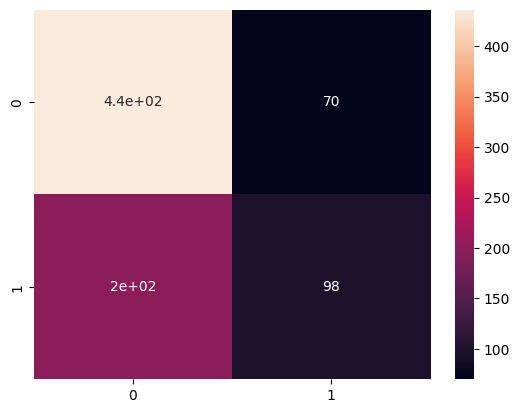

In [236]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

#### Decision Tree

In [192]:
y_test_pred = prediction.get('Decision Tree').get('y_test_pred')

In [193]:
y_train_pred = prediction.get('Decision Tree').get('y_train_pred')

In [194]:
print_results(prediction.get('Decision Tree'))

---------------------------------------------------
The accuracy_score_train is: 
 0.6188098210570121
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6296758104738155
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.4948453608247423
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.16216216216216217
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.24427480916030533
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[457  49]
 [248  48]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pr

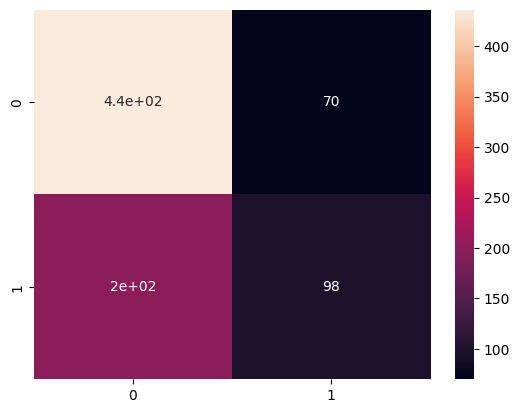

In [237]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

### Random Forest

In [195]:
y_test_pred = prediction.get('Random Forest').get('y_test_pred')

In [196]:
y_train_pred = prediction.get('Random Forest').get('y_train_pred')

In [197]:
print_results(prediction.get('Random Forest'))

---------------------------------------------------
The accuracy_score_train is: 
 0.9875156054931336
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6670822942643392
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.6124031007751938
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.2668918918918919
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.37176470588235294
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[456  50]
 [217  79]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pre

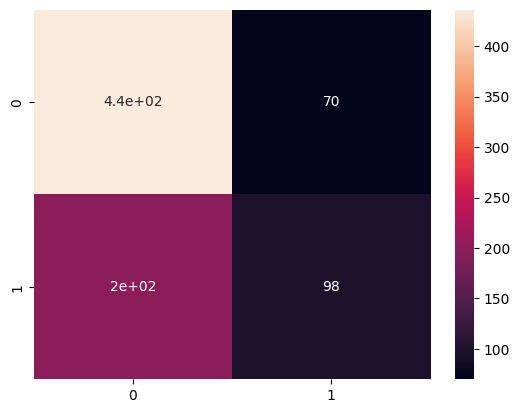

In [238]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

### Support Vector Machine

In [198]:
y_test_pred = prediction.get('Support Vector Machine').get('y_test_pred')

In [199]:
y_train_pred = prediction.get('Support Vector Machine').get('y_train_pred')

In [200]:
print_results(prediction.get('Support Vector Machine'))

---------------------------------------------------
The accuracy_score_train is: 
 0.7228464419475655
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6907730673316709
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.7222222222222222
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.2635135135135135
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.38613861386138615
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[476  30]
 [218  78]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pre

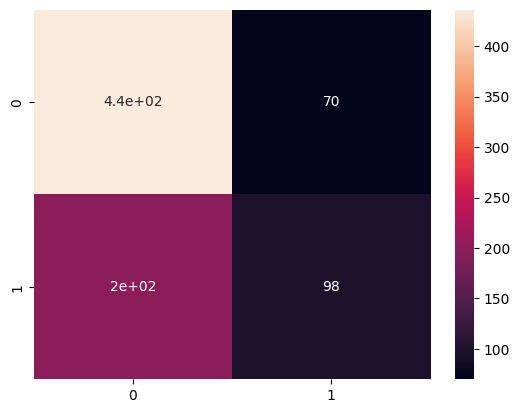

In [239]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

### k-Nearest Neighbors

In [201]:
y_test_pred = prediction.get('k-Nearest Neighbors').get('y_test_pred')

In [202]:
y_train_pred = prediction.get('k-Nearest Neighbors').get('y_train_pred')

In [203]:
print_results(prediction.get('k-Nearest Neighbors'))

---------------------------------------------------
The accuracy_score_train is: 
 1.0
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6483790523690773
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.5573770491803278
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.22972972972972974
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.3253588516746411
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[452  54]
 [228  68]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recal

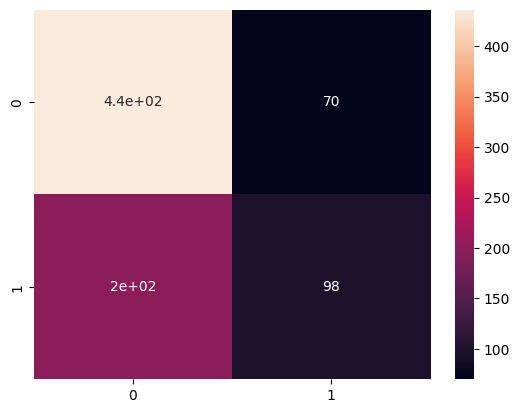

In [240]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

### Artificail Neural Network

In [204]:
y_test_pred = prediction.get('Artificial Neural Network').get('y_test_pred')

In [205]:
y_train_pred = prediction.get('Artificial Neural Network').get('y_train_pred')

In [182]:
print_results(prediction.get('Artificial Neural Network'))

---------------------------------------------------
The accuracy_score_train is: 
 0.6912193091968373
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6658354114713217
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.5833333333333334
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.3310810810810811
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.4224137931034483
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[436  70]
 [198  98]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               prec

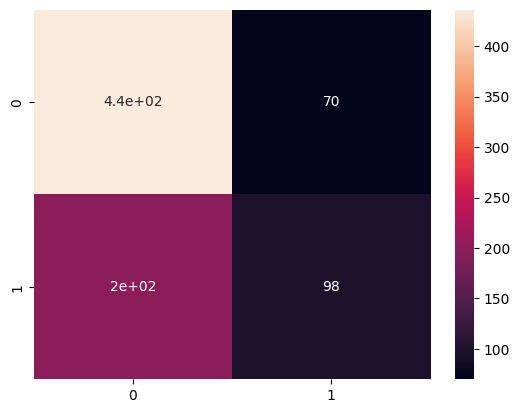

In [241]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

***In conclusion, while the model shows good performance in identifying instances of water not potable, there is room for improvement in correctly identifying positive outcomes (potability of the water). Further analysis and potentially model adjustments may be necessary to reduce false positives and false negatives, thus improving the overall performance of the classifier.***

**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?

$\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.

$\frac{TP}{TP+FN}$  

***The model demonstrates higher precision compared to recall. Given that we are working with sensitive and high-risk data, where misinterpretation of model results could have adverse effects on citizens, we will prioritize improving the model's precision.***

## Model Evaluation

### Imbalance Dataset

***During the exploratory data analysis we have seen that we have Imbalanced Classes, i.e.,the percentage of 0s - not potability of water (61%) examples is much higher with respect to the percentage of 1s - potability of water (39%) examples. Indeed, observing the confusion matrix we saw that the implemented model face some problem in predict the potability of water examples (if a the water is potable for drinking).***

***To face this problem we will apply an over-sampling technique trying to balance our dataset generating Synthetic Samples: it consists in creating new synthetic points from the minority class to increase its cardinality.***

In [71]:
os = SMOTE(random_state=0)

columns = X_train.columns

# Apply oversampling ONLY ON training data
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Potability'])

In [72]:
print("length of oversampled data is ",len(os_data_X))
print("Number of not portability in normal data",len(y[y==0]))
print("Number of portability in normal data",len(y[y==1]))
print("Number of not portability in oversampled data",len(os_data_y[os_data_y['Potability']==0]))
print("Number of portability",len(os_data_y[os_data_y['Potability']==1]))
print("Proportion of no portability data in oversampled data is ",len(os_data_y[os_data_y['Potability']==0])/len(os_data_X))
print("Proportion of portability data in oversampled data is ",len(os_data_y[os_data_y['Potability']==1])/len(os_data_X))

length of oversampled data is  2900
Number of not portability in normal data 1956
Number of portability in normal data 1249
Number of not portability in oversampled data 1450
Number of portability 1450
Proportion of no portability data in oversampled data is  0.5
Proportion of portability data in oversampled data is  0.5


#### Scale the new dataset generated

In [342]:
scaler = StandardScaler()
scaler.fit(os_data_X)
X_scaled_train_os = scaler.transform(os_data_X)
X_scaled_test_os = scaler.transform(X_test)
y_train_os = os_data_y.values

In [74]:
training_os = model_training(classifiers, parameters, X_scaled_train_os, y_train_os)

Now training Logistic Regression
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Done training Logistic Regression
Now training Decision Tree
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Done training Decision Tree
Now training Random Forest
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Done training Random Forest
Now training Support Vector Machine
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Done training Support Vector Machine
Now training k-Nearest Neighbors
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array 

Done training k-Nearest Neighbors
Now training Artificial Neural Network
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/johnomole/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs",

Done training Artificial Neural Network


In [127]:
prediction_os = model_pred(training_os, X_scaled_train_os, X_scaled_test_os, y_train_os, y_test)

#### Logistic Regression

In [128]:
y_train_pred = prediction_os['Logistic Regression'].get('y_train_pred')

In [129]:
y_test_pred = prediction_os['Logistic Regression'].get('y_test_pred')

In [130]:
print_results(prediction_os['Logistic Regression'])

---------------------------------------------------
The accuracy_score_train is: 
 0.5217241379310344
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.5224438902743143
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.39618138424821003
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.5608108108108109
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.4643356643356643
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[253 253]
 [130 166]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               pre

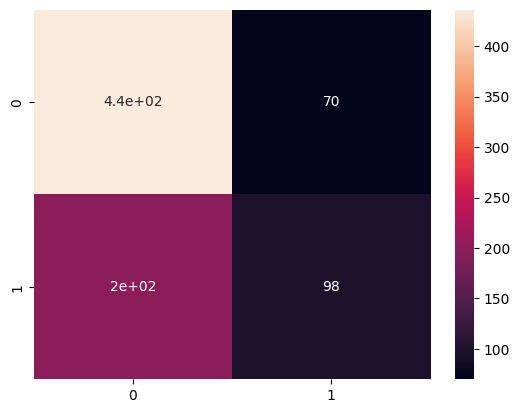

In [242]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

#### Decision Tree

In [131]:
y_train_pred = prediction_os['Decision Tree'].get('y_train_pred')

In [132]:
y_train_pred = prediction_os['Decision Tree'].get('y_train_pred')

In [133]:
print_results(prediction_os['Decision Tree'])

---------------------------------------------------
The accuracy_score_train is: 
 0.9544827586206897
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.571072319201995
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.43023255813953487
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.5
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.4625
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[310 196]
 [148 148]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recall  f1-score  

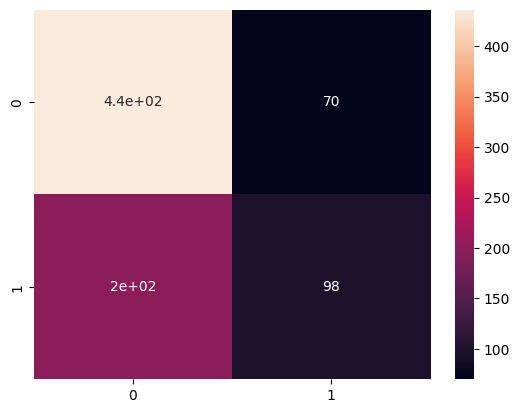

In [243]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

#### Random Forest

In [136]:
y_train_pred = prediction_os['Random Forest'].get('y_train_pred')

In [137]:
y_test_pred = prediction_os['Random Forest'].get('y_test_pred')

In [138]:
print_results(prediction_os['Random Forest'])

---------------------------------------------------
The accuracy_score_train is: 
 1.0
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6596009975062345
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.5418181818181819
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.5033783783783784
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.521891418563923
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[380 126]
 [147 149]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recall 

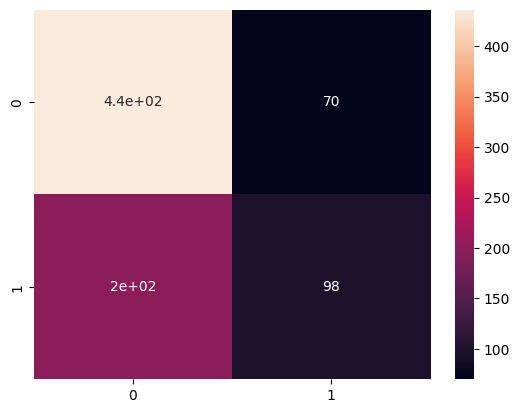

In [244]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

#### Support Vector Machine

In [139]:
y_train_pred = prediction_os['Support Vector Machine'].get('y_train_pred')

In [140]:
y_test_pred = prediction_os['Support Vector Machine'].get('y_test_pred')

In [141]:
print_results(prediction_os['Support Vector Machine'])

---------------------------------------------------
The accuracy_score_train is: 
 0.8165517241379311
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.6296758104738155
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.4986072423398329
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.6047297297297297
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.5465648854961832
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[326 180]
 [117 179]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               prec

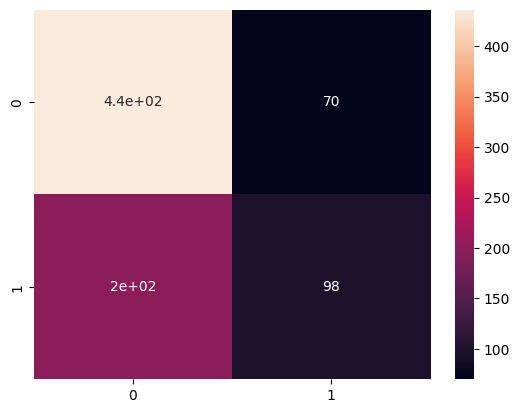

In [245]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

#### k-Nearest Neighbors

In [143]:
y_train_pred = prediction_os['k-Nearest Neighbors'].get('y_train_pred')

In [144]:
y_test_pred = prediction_os['k-Nearest Neighbors'].get('y_test_pred')

In [145]:
print_results(prediction_os['k-Nearest Neighbors'])

---------------------------------------------------
The accuracy_score_train is: 
 1.0
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.571072319201995
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.42771084337349397
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.4797297297297297
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.45222929936305734
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[316 190]
 [154 142]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recal

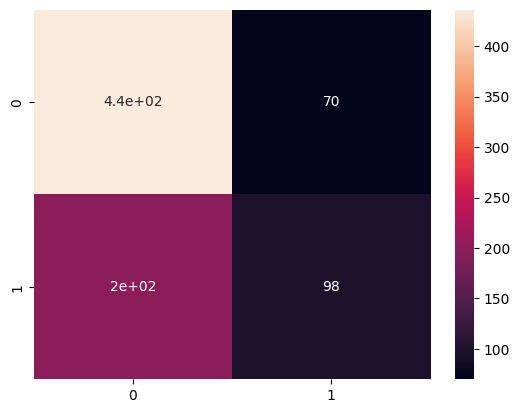

In [246]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

#### Artificail Neural Network

In [149]:
y_train_pred = prediction_os['Artificial Neural Network'].get('y_train_pred')

In [150]:
y_test_pred = prediction_os['Artificial Neural Network'].get('y_test_pred')

In [151]:
print_results(prediction_os['Artificial Neural Network'])

---------------------------------------------------
The accuracy_score_train is: 
 1.0
---------------------------------------------------
---------------------------------------------------
The accuracy_score_test is: 
 0.5997506234413965
---------------------------------------------------
---------------------------------------------------
The precision_score is: 
 0.46105919003115264
---------------------------------------------------
---------------------------------------------------
The recall_score is: 
 0.5
---------------------------------------------------
---------------------------------------------------
The f1_score is: 
 0.47974068071312803
---------------------------------------------------
---------------------------------------------------
The confusion_matrix is: 
 [[333 173]
 [148 148]]
---------------------------------------------------
---------------------------------------------------
The classification_report is: 
               precision    recall  f1-score   

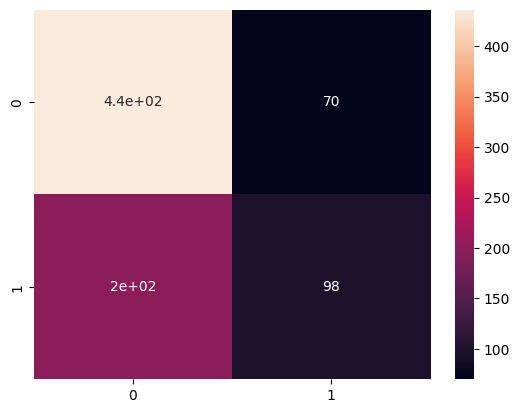

In [247]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True);
plt.show()

## Model Selection

***We have established bench mark with different sklearn model, we will now train with tensorflow keras so that we can utilised GPU for searching larger hyperparameters space and also apply more regularization***

In [312]:
!pip install scikeras -q

In [331]:
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [314]:
np.random.seed(42)
tf.random.set_seed(42)

In [396]:
def create_baseline():
	# create model
	model = keras.models.Sequential()
	model.add(keras.layers.Input(shape=(9,)))
	model.add(keras.layers.Dense(90, activation='relu'))
	model.add(keras.layers.Dropout(0.2))
	model.add(keras.layers.Dense(60, activation='relu'))
	model.add(keras.layers.Dense(30, activation='relu'))
	model.add(keras.layers.Dropout(0.2))
	model.add(keras.layers.Dense(15, activation='relu'))
	model.add(keras.layers.Dense(10, activation='relu'))
	model.add(keras.layers.Dropout(0.2))
	model.add(keras.layers.Dense(5, activation='relu'))
	model.add(keras.layers.Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
model = create_baseline()
history = model.fit(X_scaled_train_os, y_train_os, epochs=100, batch_size=5,validation_split=0.2)

Epoch 1/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.6157 - loss: 0.6756 - val_accuracy: 0.0862 - val_loss: 0.8162
Epoch 2/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.6157 - loss: 0.6532 - val_accuracy: 0.0862 - val_loss: 0.7932
Epoch 3/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.6158 - loss: 0.6445 - val_accuracy: 0.1241 - val_loss: 0.7837
Epoch 4/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.6404 - loss: 0.6387 - val_accuracy: 0.5190 - val_loss: 0.7558
Epoch 5/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.6345 - loss: 0.6346 - val_accuracy: 0.5483 - val_loss: 0.6778
Epoch 6/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.6652 - loss: 0.6194 - val_accuracy: 0.5241 - val_loss: 0.6945
Epoch 7/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.6772 - loss: 0.6143 - val_accuracy: 0.5638 - val_loss: 0.6574
Epoch 8/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.6612 - loss: 0

In [375]:
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)

In [376]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [377]:
results = cross_val_score(estimator, X_scaled_train_os, y_train_os, cv=kfold)

In [378]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 66.38% (2.79%)


## Model Export

### Unscale the data

In [400]:
X_test_unscaled = scaler.inverse_transform(X_scaled_test_os)

### Exporting the test data

In [402]:
export_path = "test_data_water_potability.csv"
unscaled_data = pd.DataFrame(X_test_unscaled, columns=X_test.columns)
unscaled_data['id'] = range(1, len(unscaled_data) + 1)
unscaled_data.to_csv(export_path, index=False)

### Exporting the model

In [403]:
model_path = "water_potability.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

### Export the scaler

In [404]:
scaler_path = "scaler.pkl"
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

## Conclusion